##Selección de librerías

In [16]:
from geopy.distance import geodesic #Librería necesaria para calcular las distancias en términos de latitud y longitud
import pandas as pd #Librería que nos permitirá operar con(y visualizar) los datos ofrecidos por el problema de la mejor forma
import numpy as np #Librería que nos permitirá hacer operaciones más complejas con colecciones de datos
import matplotlib.pyplot as plt #Librería que nos permitirá visualizar los datos

##Importación de las tablas de excel

In [13]:
#Tabla de los puntos de partida

Punto_partida = pd.read_excel('Prueba.xlsx',
                               sheet_name = 'PuntoPartida',
                               skiprows = 2,     #Tanto esta operación como la siguiente nos permiten
                               usecols = 'C:K')  #evitar los espacios en blanco de la hoja de excel
Punto_partida

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraProgramadaSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Bodega,Empresa 1,10:00:00,-100.316540,25.696300,150000,1
1,b2,Traslado de efectivo,Tienda,Empresa 1,08:58:00,-100.203823,25.663144,300000,1
2,c3,Relleno de Inventario,Bodega,Empresa 3,14:00:00,-100.145293,25.788839,1500000,1
3,d4,Relleno de Inventario,Bodega,Empresa 2,11:00:00,-100.367606,25.814914,200000,1
4,e5,Traslado de efectivo,Tienda,Empresa 3,15:00:00,-100.421277,25.744508,123000,1


In [14]:
#Tabla de los puntos de llegada

Punto_llegada = pd.read_excel('Prueba.xlsx',
                              sheet_name = 'PuntoLlegada',
                              skiprows = 1,     #Tanto esta operación como la siguiente nos permiten
                              usecols = 'B:J')  #evitar los espacios en blanco de la hoja de excel
Punto_llegada

,IDRuta,NombreRuta,TipoUbicacion,Empresa,HoraSalida,Longitud,Latitud,ValorMercancia,IDConductor
0,a1,Relleno de Inventario,Tienda,Empresa 1,10:03:00,-100.228542,25.550476,150000,1
1,b2,Traslado de efectivo,Banco,Banco 1,09:00:00,-100.318156,25.685163,300000,1
2,c3,Relleno de Inventario,Tienda,Empresa 3,14:10:00,-100.242414,25.664271,1500000,1
3,d4,Relleno de Inventario,Tienda,Empresa 2,11:00:19,-100.381548,25.664200,200000,1
4,e5,Traslado de efectivo,Banco,Banco 1,16:00:00,-100.318156,25.685163,123000,1


In [15]:
#Tabla de los siniestros

Siniestros = pd.read_excel('Prueba.xlsx',sheet_name = 'Siniestros')
Siniestros.head() #Primeros 4 datos

,FolioSiniestro,Evento,Subtipo,UnidadOperativa,IDTienda,IDVehiculo,ValorPerdido,Latitud,Longitud
0,10001415,Robo,Con violencia,Tienda,4.0,NaN,84723,25.808908,-100.379278
1,10001213,Robo,Con violencia,Vehiculo,NaN,2.0,117041,25.799021,-100.386182
2,10001224,Robo,Sin violencia,Vehiculo,NaN,2.0,116400,25.797738,-100.381691
3,10001327,Robo,Sin violencia,Vehiculo,NaN,3.0,117888,25.786821,-100.379681
4,10001316,Robo,Con violencia,Tienda,3.0,NaN,73533,25.777179,-100.180762


##Parte 1, a): Cálculo de distancias y tiempos



In [12]:
#Lista de distancias

Distancias = []
for i in range(0,5):
  Distancias.append(geodesic( (Punto_partida.iloc[i,6],Punto_partida.iloc[i,5]) , (Punto_llegada.iloc[i,6],Punto_llegada.iloc[i,5]) ).kilometers)


#Lista de tiempos

Tiempos = []
for i in range(0,5):
  tiempo_obj_1 = Punto_partida.iloc[i,4]
  horas_1 = tiempo_obj_1.hour
  minutos_1 = tiempo_obj_1.minute
  segundos_1 = tiempo_obj_1.second
  tiempo_partida = horas_1*60 + minutos_1 + segundos_1/60

  tiempo_obj_2 = Punto_llegada.iloc[i,4]
  horas_2 = tiempo_obj_2.hour
  minutos_2 = tiempo_obj_2.minute
  segundos_2 = tiempo_obj_2.second
  tiempo_llegada = horas_2*60 + minutos_2 + segundos_2/60

  Tiempos.append(tiempo_llegada - tiempo_partida)

#Sigue darle formato a los tiempos y a las distancias de las respectivas rutas

resumen = pd.DataFrame(
                          {
                              'ID de la ruta': Punto_partida['IDRuta'],
                              'Distancia (km)': Distancias,
                              'Tiempo (min)': Tiempos,
                          }
                          )

resumen

,ID de la ruta,Distancia (km),Tiempo (min)
0,a1,18.414284,3.000000
1,b2,11.734510,2.000000
2,c3,16.894569,10.000000
3,d4,16.755104,0.316667
4,e5,12.260780,60.000000


##Parte 1, b): Visualización de siniestros



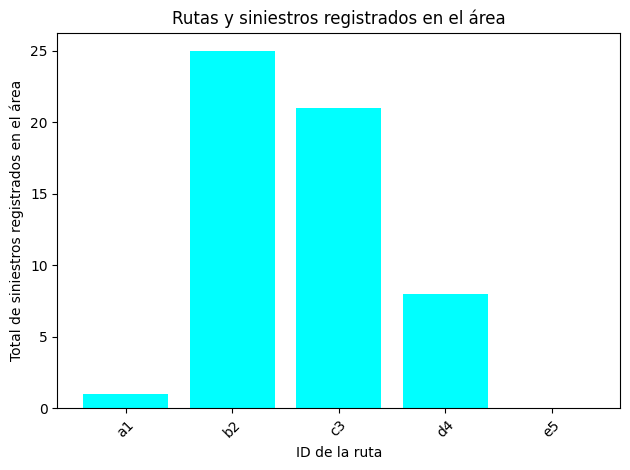

In [ ]:
#Gráfica de rutas vs número de siniestros registrados en el área

#Cálculo de distancias de los siniestros a los puntos de llegada

Siniestros_rutas = [0,0,0,0,0]

for j in range(0,55):
  indice_minimo = 0
  minimo = 100000
  for i in range(0,5):
    distance = geodesic( (Punto_llegada.iloc[i,6],Punto_llegada.iloc[i,5]) , (Siniestros.iloc[j,7],Siniestros.iloc[j,8]) )
    if distance < minimo:
      minimo = distance
      indice_minimo = i
  Siniestros_rutas[indice_minimo] = Siniestros_rutas[indice_minimo] + 1

#Visualización de los resultados

plt.bar(Punto_llegada['IDRuta'], Siniestros_rutas, color = 'cyan')
plt.title('Rutas y siniestros registrados en el área')
plt.xlabel('ID de la ruta')
plt.ylabel('Total de siniestros registrados en el área')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

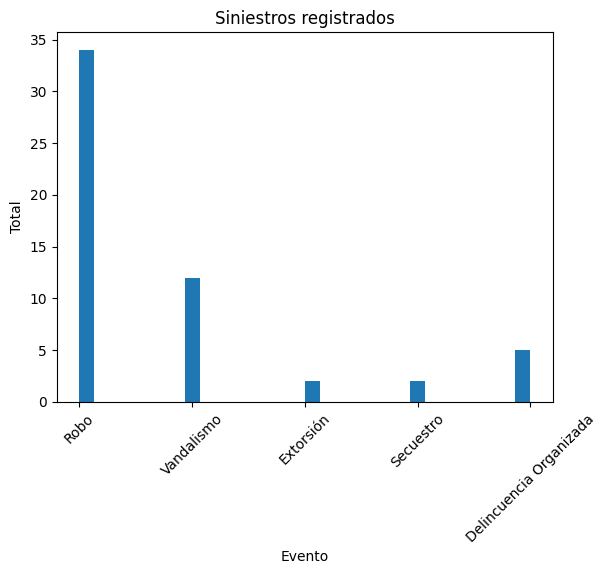

In [17]:
#Gráfica de histograma de los siniestros registrados

plt.hist(Siniestros['Evento'], bins=30)

# Añadir título y etiquetas
plt.title('Siniestros registrados')
plt.xlabel('Evento')
plt.ylabel('Total')
plt.xticks(rotation=45)


# Mostrar el gráfico
plt.show()

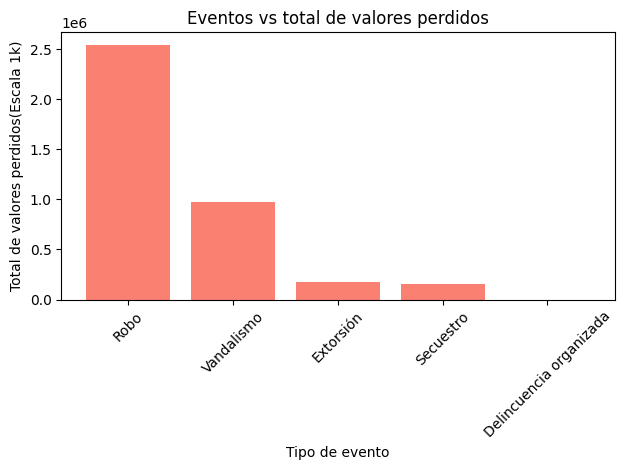

In [ ]:
#Gráfica de los valores perdidos por siniestro

costo_robo = 0
costo_vandalismo = 0
costo_extorsion = 0
costo_secuestro = 0
costo_delincuencia = 0

for i in range(0,55):
  if Siniestros.iloc[i,1] == 'Robo':
    costo_robo = costo_robo + Siniestros.iloc[i,6]
  elif Siniestros.iloc[i,1] == 'Vandalismo':
    costo_vandalismo = costo_vandalismo + Siniestros.iloc[i,6]
  elif Siniestros.iloc[i,1] == 'Extorsión':
    costo_extorsion = costo_extorsion + Siniestros.iloc[i,6]
  elif Siniestros.iloc[i,1] == 'Secuestro':
    costo_secuestro = costo_secuestro + Siniestros.iloc[i,6]
  else:
    costo_delincuencia = costo_delincuencia + Siniestros.iloc[i,6]

Val_perdidos = [costo_robo, costo_vandalismo, costo_extorsion, costo_secuestro, costo_delincuencia]
Eventos = ['Robo', 'Vandalismo', 'Extorsión', 'Secuestro', 'Delincuencia organizada']


plt.bar(Eventos, Val_perdidos, color='salmon')
plt.title('Eventos vs total de valores perdidos')
plt.xlabel('Tipo de evento')
plt.ylabel('Total de valores perdidos(Escala 1k)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##Parte 1, c): Niveles de riesgo

In [ ]:
Niveles_riesgo = (np.array(Siniestros_rutas)/55)*100

Tabla_niveles = pd.DataFrame({
                               'ID de la ruta': Punto_partida['IDRuta'],
                               'Tipo de ruta': Punto_partida['NombreRuta'],
                               'Nivel de riesgo (%)': Niveles_riesgo
                            })
Tabla_niveles

,ID de la ruta,Tipo de ruta,Nivel de riesgo (%)
0,a1,Relleno de Inventario,1.818182
1,b2,Traslado de efectivo,45.454545
2,c3,Relleno de Inventario,38.181818
3,d4,Relleno de Inventario,14.545455
4,e5,Traslado de efectivo,0.000000
